In [1]:
from ultralytics import YOLO

from IPython.display import display, Image

In [3]:
import torch
print(torch.cuda.is_available())
print(torch.cuda.get_device_name(0))

True
NVIDIA GeForce GTX 1650


In [6]:
print("Training Started")
dataset = "football-players-detection-2"
!conda run -n ml-env yolo task=detect mode=train model=yolov8s.pt data=/home/sumit/programming/yolo/football-players-detection-2/data.yaml epochs=25 imgsz=800 plots=True device=0 batch=4
print("Training Completed")


Training Started
New https://pypi.org/project/ultralytics/8.3.92 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.90 🚀 Python-3.10.13 torch-2.5.1 CUDA:0 (NVIDIA GeForce GTX 1650, 3717MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/home/sumit/programming/yolo/football-players-detection-2/data.yaml, epochs=25, time=None, patience=100, batch=4, imgsz=800, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes

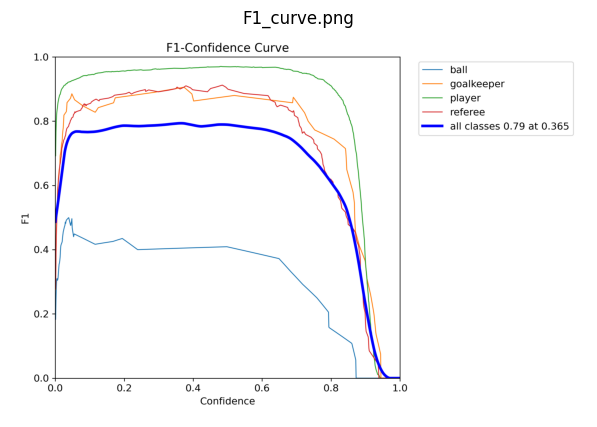

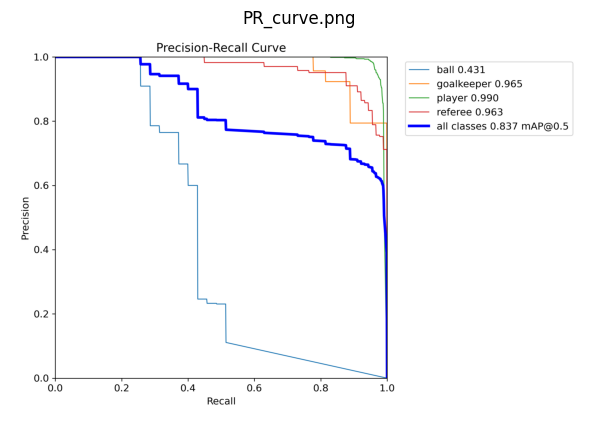

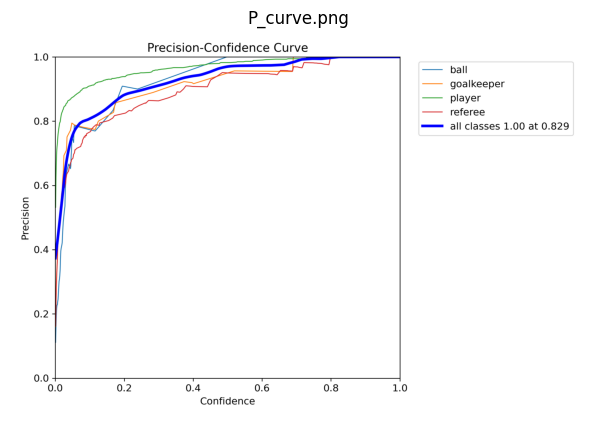

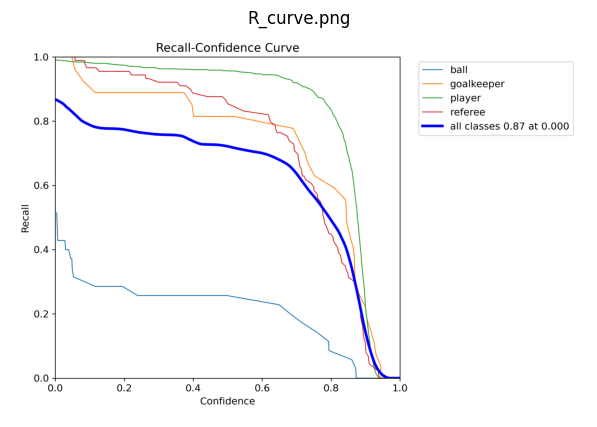

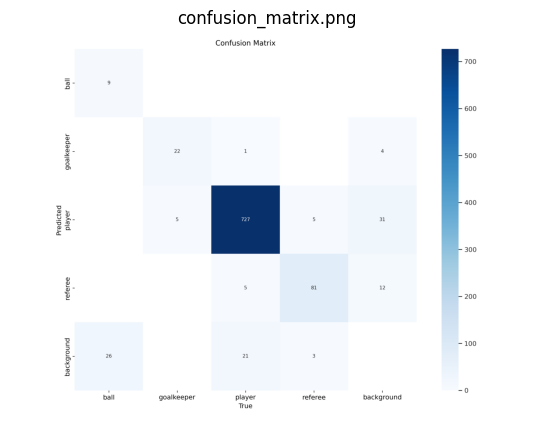

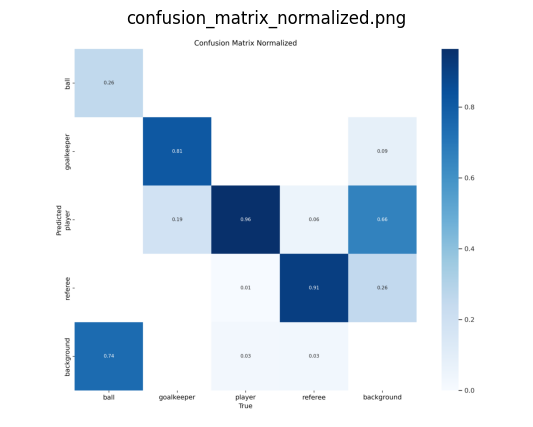

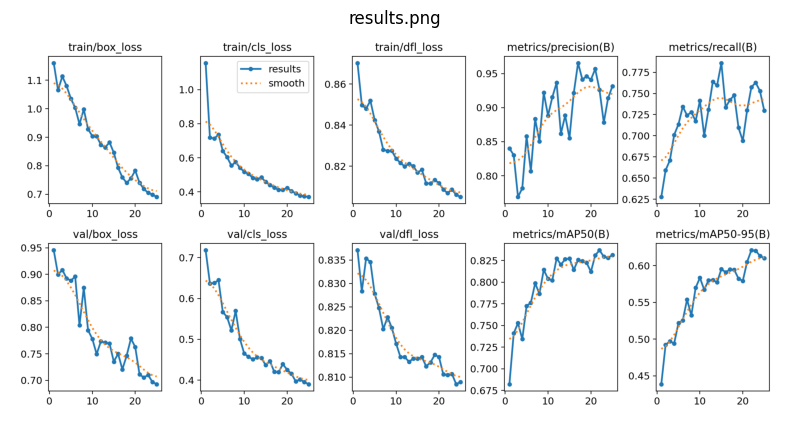

In [2]:
import matplotlib.pyplot as plt
import os
from glob import glob
from PIL import Image

train_results_path = "runs/detect/train3"

image_files = sorted(glob(os.path.join(train_results_path, "*.png")))

for image_file in image_files:
    img = Image.open(image_file)
    plt.figure(figsize=(10, 5))
    plt.imshow(img)
    plt.axis("off")
    plt.title(os.path.basename(image_file))
    plt.show()



image 1/1 /home/sumit/programming/yolo/test.jpg: 480x800 15 players, 21.1ms
Speed: 2.1ms preprocess, 21.1ms inference, 69.2ms postprocess per image at shape (1, 3, 480, 800)
Results saved to runs/detect/predict


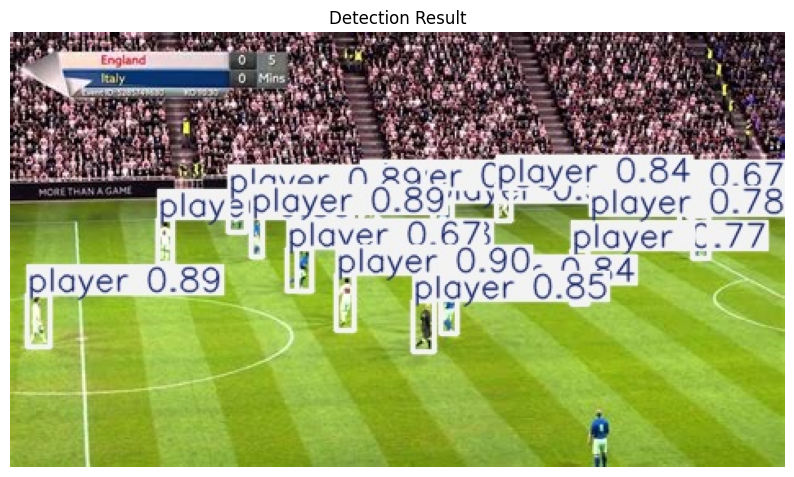

In [1]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt


model = YOLO("runs/detect/train3/weights/best.pt")
results = model("test.jpg", conf=0.25, save=True)

output_img_path = "runs/detect/predict/test.jpg"
img = cv2.imread(output_img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 6))
plt.imshow(img)
plt.axis("off")
plt.title("Detection Result")
plt.show()
